In [1]:
## Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd

In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps
import array

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

In [4]:
import os, datetime

In [5]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")

    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

# Analysis

In [6]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
era = "2017"

if selection == "mumug" or selection == "elelg":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = 'V4_phID_isConv'
        #SampleSet = 'V4_phID_isConv_MINUIT'
        SampleSet = 'V6_lPhoton'
        
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt','genPhotonEta','genPhotonPhi',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets',#'nTaus','nBJets',
            'passElectronVeto',
            ]
elif selection == "ee":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'    
    
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 
            #'eventWeight','puWeight',
            'genWeight','triggerWeight','photonIDWeight',
            #'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneCharge',
            #'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoCharge',
            #'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneEta',
            #'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            #'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            #'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            #'photonOneScEtaWidth','photonOneScPhiWidth',
            #'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            #'genPhotonPt',
            #'vetoDY','genIsoPass',
            #'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            #'nMuons','nElectrons','nTaus','nPhotons','nJets','nBJets',
            #'ProbeIDPass','ProbeISOPass','ProbeWorstPass','ProbeSigPass','ProbeIsConv',
            ]
path    = "/home/jcordero/CMS/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = path+"Reduced"

figpath = dirStructure(figpath)


Help    = Helper(era)
Help.figpath = figpath
Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)
Cut = Cuts()

Directory 2020213/ already exist
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/mumug/2020213/nJets/Stacked_nJets0/ already exists or failed.
Subdi

In [10]:
def ReadFromRegion(Plotter,path, Region):
    Names =['WJets','WWTo2L2Nu','TTTo2L2Nu','DYJets','ZGToLLG', 'DoubleMuon_2017']
    reduced = []
    for name in Names:
        print('----- Reading '+name+' in Region ' +Region+ '--------')
        filename = path+'/'+name+'_'+Region.replace(" ","")+'.csv'
        print('-- '+filename)
        
        reduced.append(pd.read_csv(filename))
    isData = [True if name == 'DoubleMuon_'+era else False for name in Names]
    data = [Data(df = reduced[i],nameFile = Names[i],data = isData[i], Print=False)  for i in range(len(Names))]

    data, legend, colors, isData = Plotter.Help.SetDataOpt(data,selection = selection,exclude = [''])
    Plotter.SetPlotOpt(legend=legend,colors = colors)

    return data,legend,colors,isData

In [12]:
data = {}

Region = ''
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,Region)

----- Reading WJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WJets_.csv
----- Reading WWTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/WWTo2L2Nu_.csv
----- Reading TTTo2L2Nu in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/TTTo2L2Nu_.csv
----- Reading DYJets in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DYJets_.csv
----- Reading ZGToLLG in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/ZGToLLG_.csv
----- Reading DoubleMuon_2017 in Region --------
-- /home/jcordero/CMS/data_2017/rereco/SMP_ZG/Files/mumug/V6_lPhoton/Reduced/DoubleMuon_2017_.csv
0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2017 k


In [13]:
def Hist2d(d,
           part1,var1,ph1,
           part2,var2,ph2,
           log,
           label = None,
          ):

    ranges,bins = {},{}
    wei = {}

    if log:
        logScale = col.LogNorm()
    else:
        logScale = None

    ########
    d.ResetCuts()

    if   ph1 == 'EE':
        d.AddCuts(np.logical_and(
                                np.array(d.df.photonOneEta) > 1.4442,
                                np.array(d.df.photonOneEta) <= 2.5
                                )
                )
    elif ph1 == 'EB':
        d.AddCuts(
                np.array(d.df.photonOneEta) < 1.4442
                )
    else:
        d.ResetCuts()


    x = d.GetWithCuts(part1+var1+'')
    #ranges[var1],bins[var1] = Help.GET_RangeBins(part=part1,var=var1,ph='')
    ranges[var1] = [0.2,6.2]
    bins[var1] = np.arange(0.2,6,step=0.2)
    
    wei[var1] = d.GetWithCuts('weight')

    ##############################
    d.ResetCuts()

    if   ph2 == 'EE':
        d.AddCuts(np.logical_and(
                                np.array(d.df.photonOneEta) > 1.4442,
                                np.array(d.df.photonOneEta) <= 2.5
                                )
                )
    elif ph2 == 'EB':
        d.AddCuts(
                np.array(d.df.photonOneEta) < 1.4442
                )
    else:
        d.ResetCuts()

    y = d.GetWithCuts(part2+var2+'')
    ranges[var2],bins[var2] = Help.GET_RangeBins(part=part2,var=var2,ph='')
    if ph2 == 'EB':
        ranges[var2] = [0.003,0.016]
    else:
        ranges[var2] = [0.016,0.05]
    wei[var2] = d.GetWithCuts('weight')

    ##############################

    print('Corr:\n',np.corrcoef(x,y))
    fig = plt.figure(figsize=(10,8))
    
    #print(len(x),  len(y))
    #print(len(bins[var1]),  len(bins[var2]))
    #print(bins[var1],  bins[var2])
    
    plt.hist2d(x,y,
               bins    = [  bins[var1],  bins[var2]],
               range   = [ranges[var1],ranges[var2]],
               #weights = [   wei[var1],   wei[var2]],
               norm = logScale,
                );
    plt.title(label)
    plt.colorbar()
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    
    return fig,x,y

Corr:
 [[nan nan]
 [nan nan]]


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


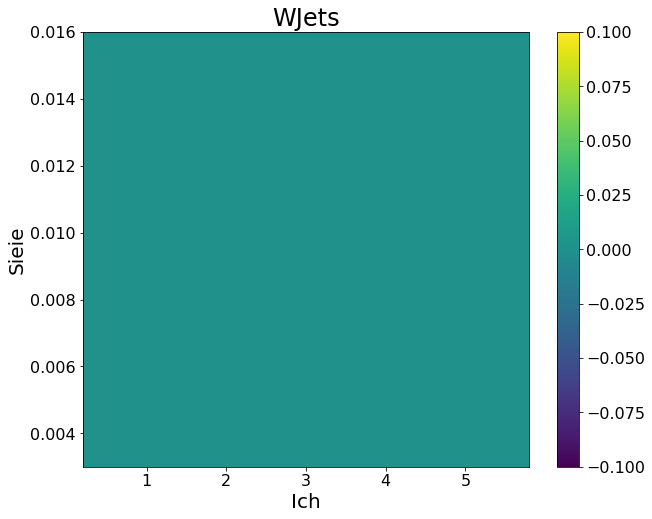

Corr:
 [[ 1.         -0.03463294]
 [-0.03463294  1.        ]]


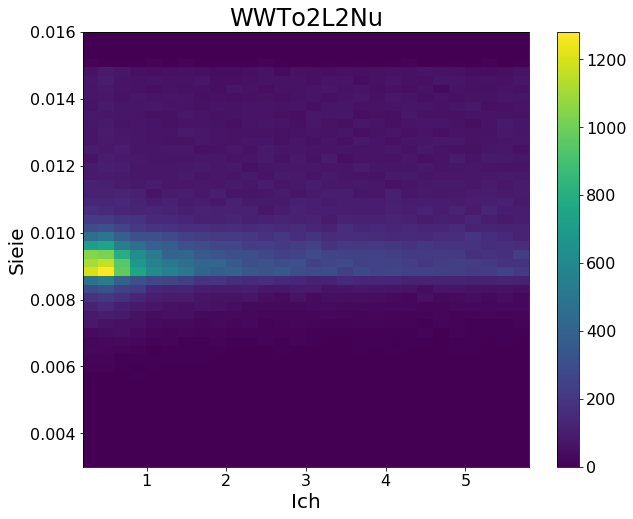

Corr:
 [[ 1.         -0.01967374]
 [-0.01967374  1.        ]]


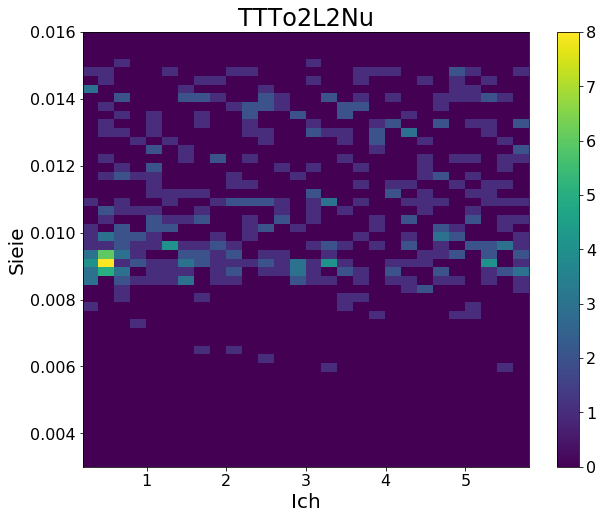

Corr:
 [[ 1.         -0.11264078]
 [-0.11264078  1.        ]]


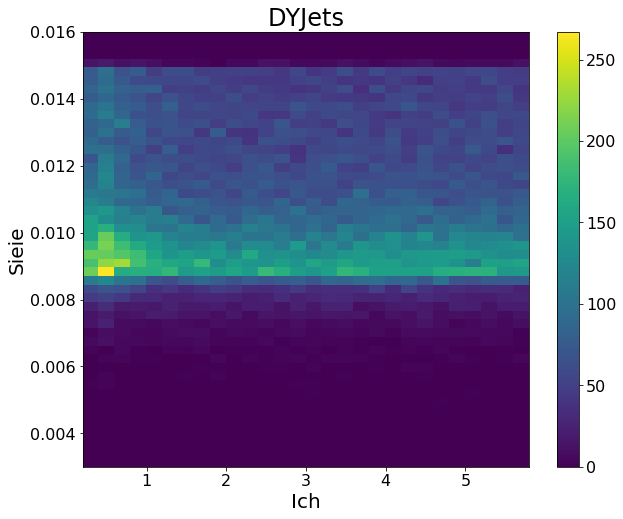

Corr:
 [[1.        0.0119537]
 [0.0119537 1.       ]]


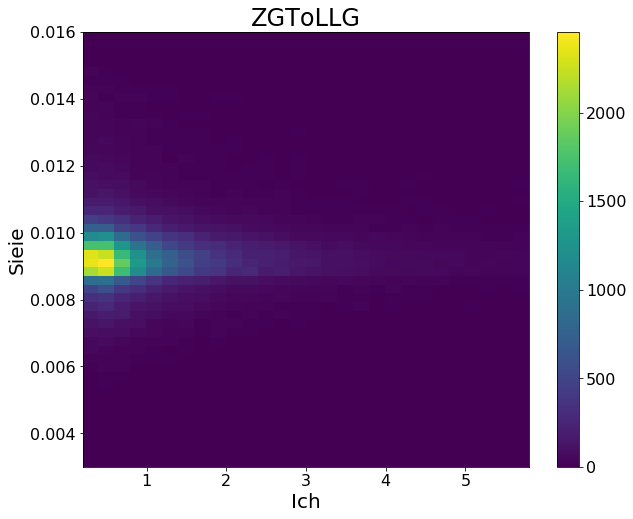

In [14]:
#log = True
log = False

##########################

part1 = 'photonOne'
var1 = 'Ich'
#ph1 = ''
ph1 = 'EB'
#ph1 = 'EE'

##########################
#part2 = 'dilepton'
#var2 = 'M'

part2 = 'photonOne'
var2 = 'Sieie'
#ph2 = ''
ph2 = 'EB'
#ph2 = 'EE'
##########################

#for i in range(len(data[''][:-1])):
for i in range(len(data[''][:-1])):
    if not data[''][i].df.empty:
        
        Cut.PhaseSpace(data = data[''],
                       Region='IPFS',
                      )
        fig,x,y = Hist2d(d=data[''][i],
                        part1 = part1,var1 = var1,ph1 = ph1,
                        part2 = part2,var2 = var2,ph2 = ph2,
                        log   = log,
                        label = data[''][i].name,
                        )
        fig.savefig(figpath+'H2D_'+data[''][i].name+'_'+ph1+'.png')